# Implementing a linear regression predictor from scratch to predict the fire radiation power (frp) of various fires in Australia.

In [37]:
# importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [38]:
# importing dataset
df = pd.read_csv('dev.csv')
df.head()

,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,26000,-35.441,150.028,361.8,1.4,1.2,2019-12-04,1230,Terra,MODIS,100,6.0NRT,292.4,151.8,N
1,26001,-36.120,149.515,337.7,1.4,1.2,2020-01-03,2345,Terra,MODIS,83,6.0NRT,308.1,42.0,D
2,26002,-32.416,120.183,339.6,1.1,1.0,2019-12-08,600,Aqua,MODIS,62,6.0NRT,304.0,30.9,D
3,26003,-16.548,126.861,310.6,1.1,1.0,2019-11-20,1405,Terra,MODIS,70,6.0NRT,299.4,6.0,N
4,26004,-30.617,151.032,314.1,1.0,1.0,2019-12-19,1505,Aqua,MODIS,88,6.0NRT,294.6,12.9,N


In [39]:
df.describe()

,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,28000.000000,-27.145360,141.947713,338.458285,1.586803,1.202374,838.165459,74.754811,303.090602,90.764434
std,1155.133542,8.130476,11.049703,28.364577,0.802135,0.245646,625.875284,25.268896,13.390463,255.514094
min,26000.000000,-42.143000,114.156000,300.000000,1.000000,1.000000,0.000000,0.000000,269.600000,0.000000
25%,27000.000000,-33.067000,131.422000,320.300000,1.000000,1.000000,345.000000,59.000000,293.600000,17.800000
50%,28000.000000,-30.152000,147.928000,333.700000,1.200000,1.100000,530.000000,82.000000,301.700000,35.000000
75%,29000.000000,-18.209000,150.667000,348.400000,1.800000,1.300000,1350.000000,99.000000,311.300000,80.300000
max,30000.000000,-10.954000,153.413000,506.600000,4.800000,2.000000,2355.000000,100.000000,400.100000,11091.600000


In [40]:
# Checking the dimensions of the data
df.shape

(4001, 15)

In [41]:
# all column names
df.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'brightness', 'scan', 'track',
       'acq_date', 'acq_time', 'satellite', 'instrument', 'confidence',
       'version', 'bright_t31', 'frp', 'daynight'],
      dtype='object')

# DATA VISUALISATION

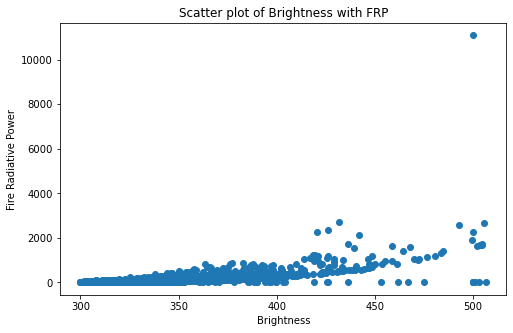

In [47]:
# Scatter Plot
fig = plt.figure(figsize=(8,5))
plt.scatter(x=df['brightness'],y=df['frp'])
plt.title('Scatter plot of Brightness with FRP')
plt.xlabel('Brightness')
plt.ylabel('Fire Radiative Power')
plt.show()

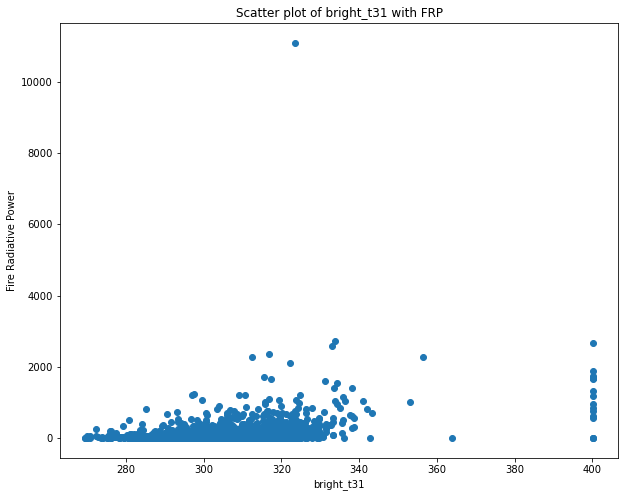

In [43]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x=df['bright_t31'],y=df['frp'])
plt.title('Scatter plot of bright_t31 with FRP')
plt.xlabel('bright_t31')
plt.ylabel('Fire Radiative Power')
plt.show()

In [44]:
df.corr()

,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp
Unnamed: 0,1.000000,-0.003215,-0.003785,-0.020684,-0.022311,-0.022587,-0.002107,0.001984,-0.017630,-0.007362
latitude,-0.003215,1.000000,-0.428328,-0.098355,0.103811,0.107916,-0.247150,-0.087461,0.191465,-0.083812
longitude,-0.003785,-0.428328,1.000000,-0.111958,-0.143321,-0.149811,0.199973,-0.037521,-0.339060,-0.078173
brightness,-0.020684,-0.098355,-0.111958,1.000000,-0.112122,-0.118113,-0.324761,0.523655,0.686934,0.564283
scan,-0.022311,0.103811,-0.143321,-0.112122,1.000000,0.982670,0.000412,-0.121355,-0.090377,0.163600
track,-0.022587,0.107916,-0.149811,-0.118113,0.982670,1.000000,0.005421,-0.128080,-0.091744,0.159773
acq_time,-0.002107,-0.247150,0.199973,-0.324761,0.000412,0.005421,1.000000,-0.066235,-0.482740,-0.087363
confidence,0.001984,-0.087461,-0.037521,0.523655,-0.121355,-0.128080,-0.066235,1.000000,0.265843,0.219825
bright_t31,-0.017630,0.191465,-0.339060,0.686934,-0.090377,-0.091744,-0.482740,0.265843,1.000000,0.326600
frp,-0.007362,-0.083812,-0.078173,0.564283,0.163600,0.159773,-0.087363,0.219825,0.326600,1.000000


## From the correlation table above, we can see that brightness and fire radiation power are positively correlated. Though it is not a strong postive correlation, it is the only one that is close to 0.7 or above 0.5

# Data Preparation

In [ ]:
x = df.iloc[:, :-1].val